## Project Two Submission




## Final Project Submission

Please fill out:
* Student name: Maree Marinelis
* Student pace: part time
* Scheduled project review date/time: 3rd December 2023
* Instructor name: Hardik Idnani

In [2823]:
# Your code here - remember to use markdown cells for comments as well!

In [2824]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import statsmodels.api as sm
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Data Exploration

In [2825]:
df = pd.read_csv('data/kc_house_data.csv')

In [2826]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


We can see from here that there are some null and incomplete values. These will need to be dealt with to ensure we have complete data to work with.

In [2827]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Here we're assessing how many null values there are and which columns will need to be modified to ensure we have accurate data. The waterfront, view and yr_renovated columns have null values that we'll need to manage. Before dropping them, we can try to see if we can find the average of these these values to plug into our null rows.

In [2828]:
waterfront_average = df['waterfront'].mean()
print(waterfront_average)

0.007595858696217679


In [2829]:
yr_renovated_average = df['yr_renovated'].mean()
print(yr_renovated_average)

83.6367783722895


In [2830]:
view_average = df['view'].mean()
print(view_average)

0.23386272870808952


Unfortunately finding the average did not find clear, round values as we'd hoped. As such we will be replacing all null/NaN values with 0 for simplicity.

In [2831]:
# Replace NaN values with 0 in multiple columns
columns_to_replace = ['waterfront', 'yr_renovated', 'view']
df[columns_to_replace] = df[columns_to_replace].fillna(0)
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Now that there are no null values, let's look at our datatypes

In [2832]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

As the yr_renovated shows a float datatype, which indicates that it is in a decimal format, we'll need to update this so that we can perform a complete analysis of this.

In [2833]:
df['yr_renovated_int'] = df['yr_renovated'].astype(int)

In [2834]:
basement_question_mark = df['sqft_basement'].isin(['?']).any()
print(basement_question_mark)

True


Likewise, it appears that sqft_basement includes some string values, which we found to be '?'. Let's remove these and replace them with 0

In [2835]:
df['sqft_basement_int'] = df['sqft_basement'].replace('?', 0).astype(float).astype(int)

In [2836]:
df_clean = df.drop(columns=['date', 'id', 'yr_renovated', 'sqft_basement', 'lat', 'long', 'zipcode'])

As we've created new columns for yr_renovated, sqft_basement we'll remove these original columns from our dataset. Likewise, we'll remove date and ID as they likely will not serve any use in our analysis. We'll also be removing lat, long and zipcode as there won't be enough time to evaluate these. In a future analysis I'd like to determine the location of these houses and determine whether their proximity to city/town centers impact their price, or even some of their features.

In [2837]:
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,yr_renovated_int,sqft_basement_int
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,1690,7639,1991,400
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,1360,5000,0,910
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,1800,7503,0,0


As yr_renovated is float, we'll need to convert this to int, as there shouldn't be any decimals of years. We'll firstly need to get rid of all the rows that have NaN. 

In [2838]:
df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,yr_renovated_int,sqft_basement_int
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,1970.999676,1986.620318,12758.283512,68.758207,285.716581
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,29.375234,685.230472,27274.441950,364.037499,439.819830
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,399.000000,651.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,1490.000000,5100.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,1840.000000,7620.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,2360.000000,10083.000000,0.000000,550.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,6210.000000,871200.000000,2015.000000,4820.000000


In [2839]:
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0,322000.00,450000.00,645000.0,7700000.0
bedrooms,21597.0,3.373200,0.926299,1.0,3.00,3.00,4.0,33.0
bathrooms,21597.0,2.115826,0.768984,0.5,1.75,2.25,2.5,8.0
sqft_living,21597.0,2080.321850,918.106125,370.0,1430.00,1910.00,2550.0,13540.0
sqft_lot,21597.0,15099.408760,41412.636876,520.0,5040.00,7618.00,10685.0,1651359.0
floors,21597.0,1.494096,0.539683,1.0,1.00,1.50,2.0,3.5
waterfront,21597.0,0.006760,0.081944,0.0,0.00,0.00,0.0,1.0
view,21597.0,0.233181,0.764673,0.0,0.00,0.00,0.0,4.0
condition,21597.0,3.409825,0.650546,1.0,3.00,3.00,4.0,5.0
grade,21597.0,7.657915,1.173200,3.0,7.00,7.00,8.0,13.0


# Understanding our data

Price: The average price of a house is approximately $540,296 with a wide range of prices from $78,000 to $7,700,000 suggesting a more diverse market that includes both affordable and luxury housing. 

The standard deviation is quite high at $367,368, which means there may be significant variability in house prices, and could impact our model later on.

Bedrooms: Houses have an average of about 3.37 bedrooms, with a minimum of 1 and a maximum of 33, which is quite unusualWe'll remove this entry to avoid any unnecessary skewing of data.

Bathrooms: On average, houses have about 2.11 bathrooms, which seems reasonable.

Square Footage: The living space averages 2,080 square feet, with a relatively large standard deviation, indicating varied house sizes. The lot (sqft_lot) are, on average, 15,099 square feet, but with a very large standard deviation, suggesting there are some very large properties.

Floors: The average number of floors is about 1.49, with houses generally ranging from 1 to 3.5 floors.

Waterfront: The waterfront variable's mean is close to 0, indicating very few waterfront properties in the dataset.

View: Properties don't often have a view (mean close to 0), but there's some variability, which could be a factor in pricing.

Condition: The average condition rating is around 3.41, which might suggest that most homes are in "average" condition.

Grade: The average grade is about 7.65, which likely corresponds to the construction quality and design of the houses.

Year Built: The average year built is around 1970, with homes built as early as 1900 and as recent as 2015.

Year Renovated: The average year of renovation is 68.75, which is suspiciously low and may indicate that the majority of homes have not been renovated (the value is likely skewed by a large number of 0s where renovations have not occurred).

Basement: The square footage of basements averages 285.72, but the presence of 0 suggests that not all houses have a basement.

In [2840]:
# lets remove entries where bedrooms are 33 as this is skewing our data
df_clean = df_clean[df_clean['bedrooms'] != 33]

In [2841]:
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21596.0,540291.956751,367376.019328,78000.0,322000.00,450000.00,645000.0,7700000.0
bedrooms,21596.0,3.371828,0.904114,1.0,3.00,3.00,4.0,11.0
bathrooms,21596.0,2.115843,0.768998,0.5,1.75,2.25,2.5,8.0
sqft_living,21596.0,2080.343165,918.122038,370.0,1430.00,1910.00,2550.0,13540.0
sqft_lot,21596.0,15099.830107,41413.549419,520.0,5040.00,7619.00,10685.5,1651359.0
floors,21596.0,1.494119,0.539685,1.0,1.00,1.50,2.0,3.5
waterfront,21596.0,0.006761,0.081946,0.0,0.00,0.00,0.0,1.0
view,21596.0,0.233191,0.764689,0.0,0.00,0.00,0.0,4.0
condition,21596.0,3.409752,0.650471,1.0,3.00,3.00,4.0,5.0
grade,21596.0,7.657946,1.173218,3.0,7.00,7.00,8.0,13.0


# What does this mean?

Pricing Strategy: The significant variability in house prices indicates that the company can cater to a wide range of customers, from those looking for budget-friendly options to those in the market for luxury homes.

The data provides insights into various segments of the housing market, such as the number of bedrooms and bathrooms, which can help the company target specific customer needs.

Renovation Impact: With the year of renovation affecting the 'yr_renovated_int' value significantly, we might consider the impact of renovations on property value and the potential for flipping houses.

Feature Focus: The presence of waterfront properties, although rare, along with views and grades, should be considered in the marketing strategy as these features can significantly affect prices.

Condition and Age: Since most homes are in average condition and were built around 1970, there may be opportunities for the company to invest in updates and market the potential for modernization.

Investment Opportunities: The wide range in lot sizes suggests potential for land development or offering larger lots as premium options.

<Figure size 1200x800 with 0 Axes>

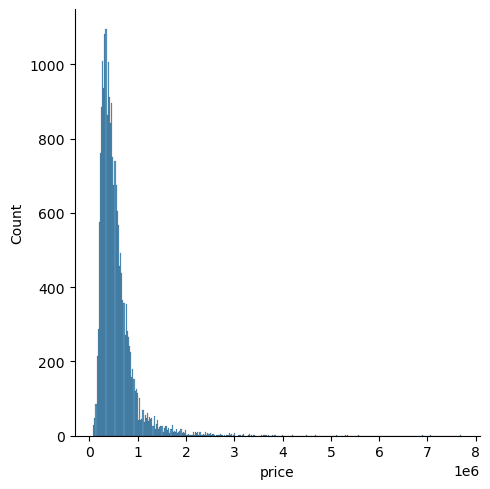

In [2842]:
plt.figure(figsize = (12,8)) #Lets visualise the distribution with our cleaned df.
sns.displot(df_clean['price'])

# What does this mean?
The distribution is right-skewed, with most of the houses priced at the lower end of the scale and a few houses with prices significantly higher than the average, indicating the presence of some luxury, high-value properties. The peak of the distribution is near the lower price range, which suggests that there's a significant amount of properties which are more affordable.

We will also need to review and remove the outliers in the data

In [2843]:
def remove_outliers(df_clean, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

/var/folders/38/lrmvzxvj23x3_qbt7ltrk2l80000gn/T/ipykernel_29722/1257658068.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['price'])


<Axes: xlabel='price', ylabel='Density'>

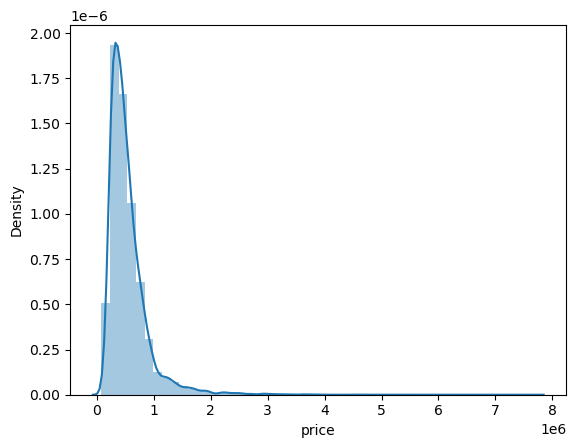

In [2844]:
sns.distplot(df_clean['price'])

# What does this mean?

The removal of outliers has narrowed the range of prices however the concentration of values still very focused on the lower end with a right-skewed tail.

Before removing outliers:
count    2.159600e+04
mean     5.402920e+05
std      3.673760e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

After removing outliers:
count    2.043800e+04
mean     4.766946e+05
std      2.077922e+05
min      7.800000e+04
25%      3.150000e+05
50%      4.375000e+05
75%      6.000000e+05
max      1.120000e+06
Name: price, dtype: float64


Text(0, 0.5, 'Count')

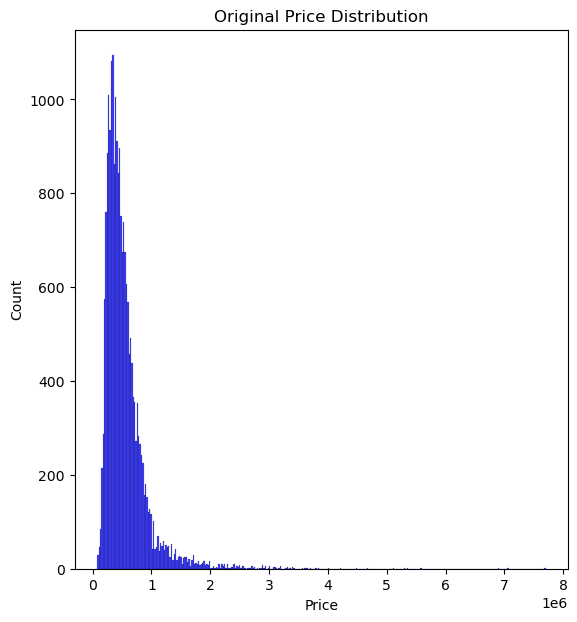

In [2845]:
# Remove outliers from the 'price' column
df_no_outliers = remove_outliers(df_clean, 'price')

# Descriptive statistics before removing outliers
print("Before removing outliers:")
print(df_clean['price'].describe())

# Descriptive statistics after removing outliers
print("\nAfter removing outliers:")
print(df_no_outliers['price'].describe())

# Histograms for visual comparison
plt.figure(figsize=(14, 7))

# Histogram of the original 'price' data
plt.subplot(1, 2, 1)
sns.histplot(df_clean['price'], kde=False, color='blue')
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')


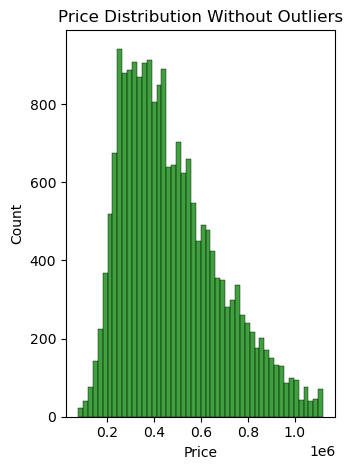

In [2846]:
# Histogram of the 'price' data after removing outliers
plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['price'], kde=False, color='green')
plt.title('Price Distribution Without Outliers')
plt.xlabel('Price')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

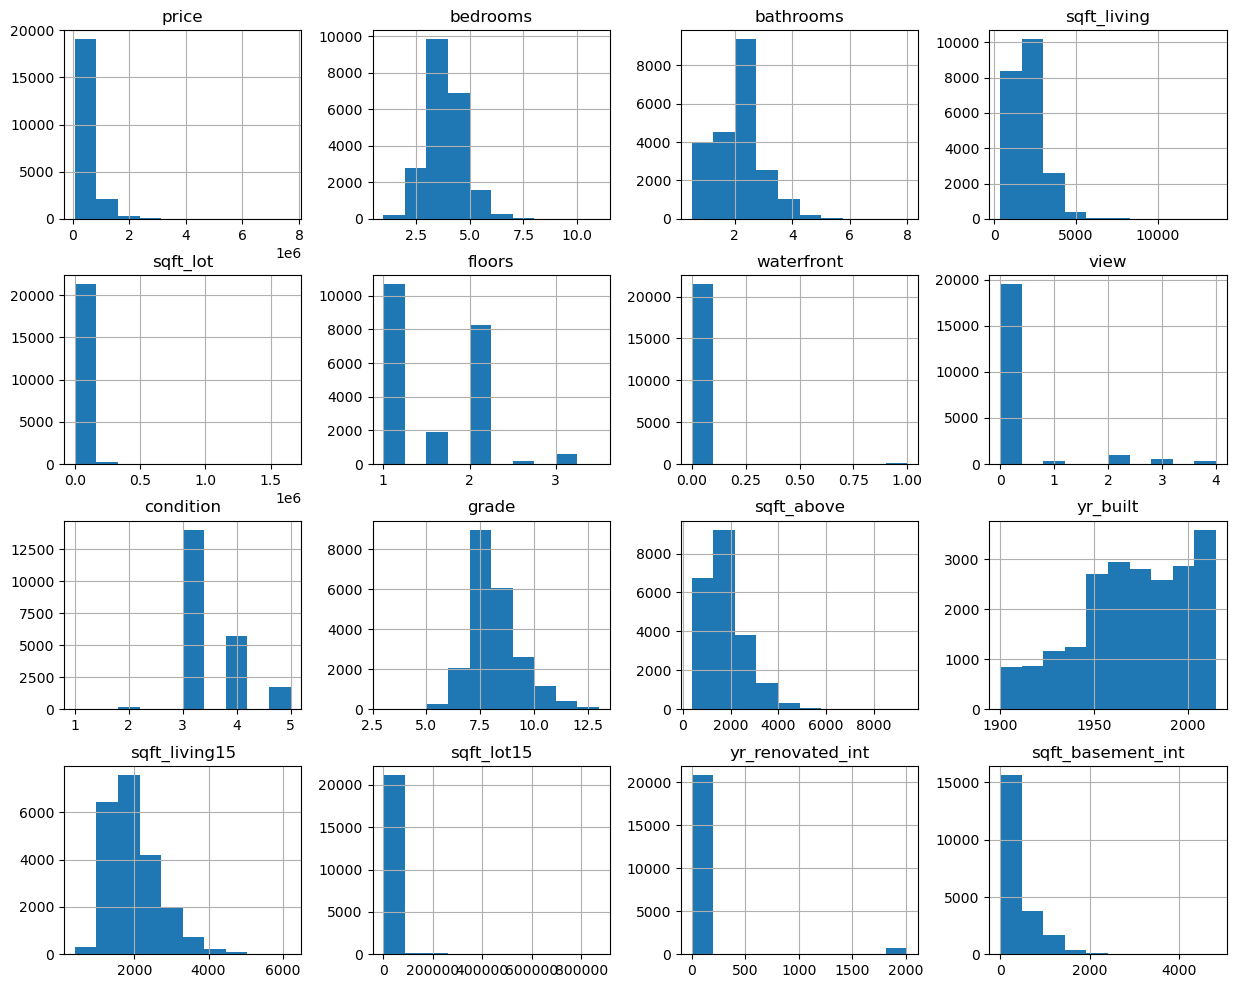

In [2847]:
df_clean.hist(figsize = (15,12))
plt.show()

# Some Key Features

Price, Bedrooms, and Bathrooms: These show a right-skewed distribution, indicating that a majority of houses have fewer bedrooms and bathrooms and are lower in price, with a few exceptions having a high number of rooms or higher prices.

Square Footage (Living, Lot, Above, Basement): The distributions suggest that most homes have modest living spaces and lot sizes, with a few larger properties.

Waterfront and View: Most properties do not have waterfront access or significant views, as indicated by the concentration of counts at the lower end of these variables.

Condition and Grade: Houses mostly fall into a small range of condition and grade categories.

Year Built and Renovated: The year built shows that many homes were constructed in recent decades, while the year renovated histogram indicates that few properties have been recently updated. The 'years_since_update' suggests that many properties have not been updated.

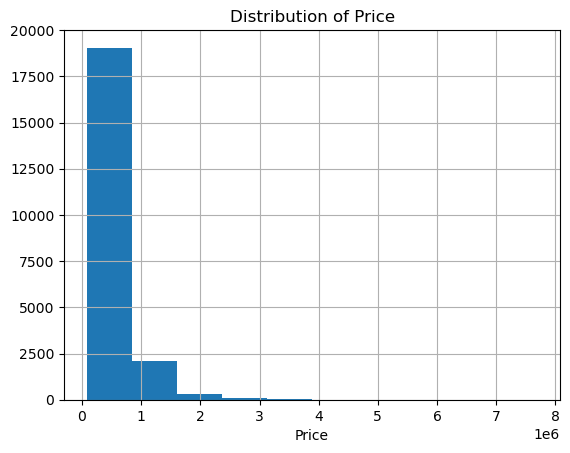

In [2848]:
# View price distribution
df_clean['price'].hist()
plt.xlabel('Price')
plt.title('Distribution of Price')
plt.show()

This highlights that the price distribution of houses is heavily concentrated on the lower end of the spectrum.

In [2849]:
Y = df_clean['price']

In [2850]:
X = df_clean.drop('price', axis=1)

In [2851]:
# Adding a constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Capture the Adjusted R-squared
adjusted_r_squared = model.rsquared_adj
print(f'Adjusted R-squared: {adjusted_r_squared}')

# To view the summary of the model which includes the Adjusted R-squared
print(model.summary())

Adjusted R-squared: 0.6547964744619719
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2732.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:03:48   Log-Likelihood:            -2.9588e+05
No. Observations:               21596   AIC:                         5.918e+05
Df Residuals:                   21580   BIC:                         5.919e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

# Interpreting these results

The results indicate that a model has been fit to predict house prices with an R-squared value of 0.654, which means approximately 65.4% of the variability in house prices can be explained by the model.

Here are some key takeaways:

Bedrooms: More bedrooms are associated with a lower house price, which is counterintuitive and may suggest multicollinearity or that other variables are capturing the effect of house size more effectively.

Bathrooms and Sqft_living: These are positively correlated with price, as typically expected.

Sqft_lot: The lot size has a very small and statistically insignificant negative impact on the house price. This variable will be dropped.

Floors and Waterfront: These features have a positive impact on house prices.

Condition and Grade: Higher values are associated with higher house prices, indicating that property condition and build quality are important factors.

Sqft_above and Sqft_basement: The above-ground living space has a positive association with price, whereas basement size has a negative but small effect.

Year Built and Renovated: Newer or recently renovated houses tend to be priced higher.

Let's visualise the correlation with these variables to look for multicollinearity:

<Axes: >

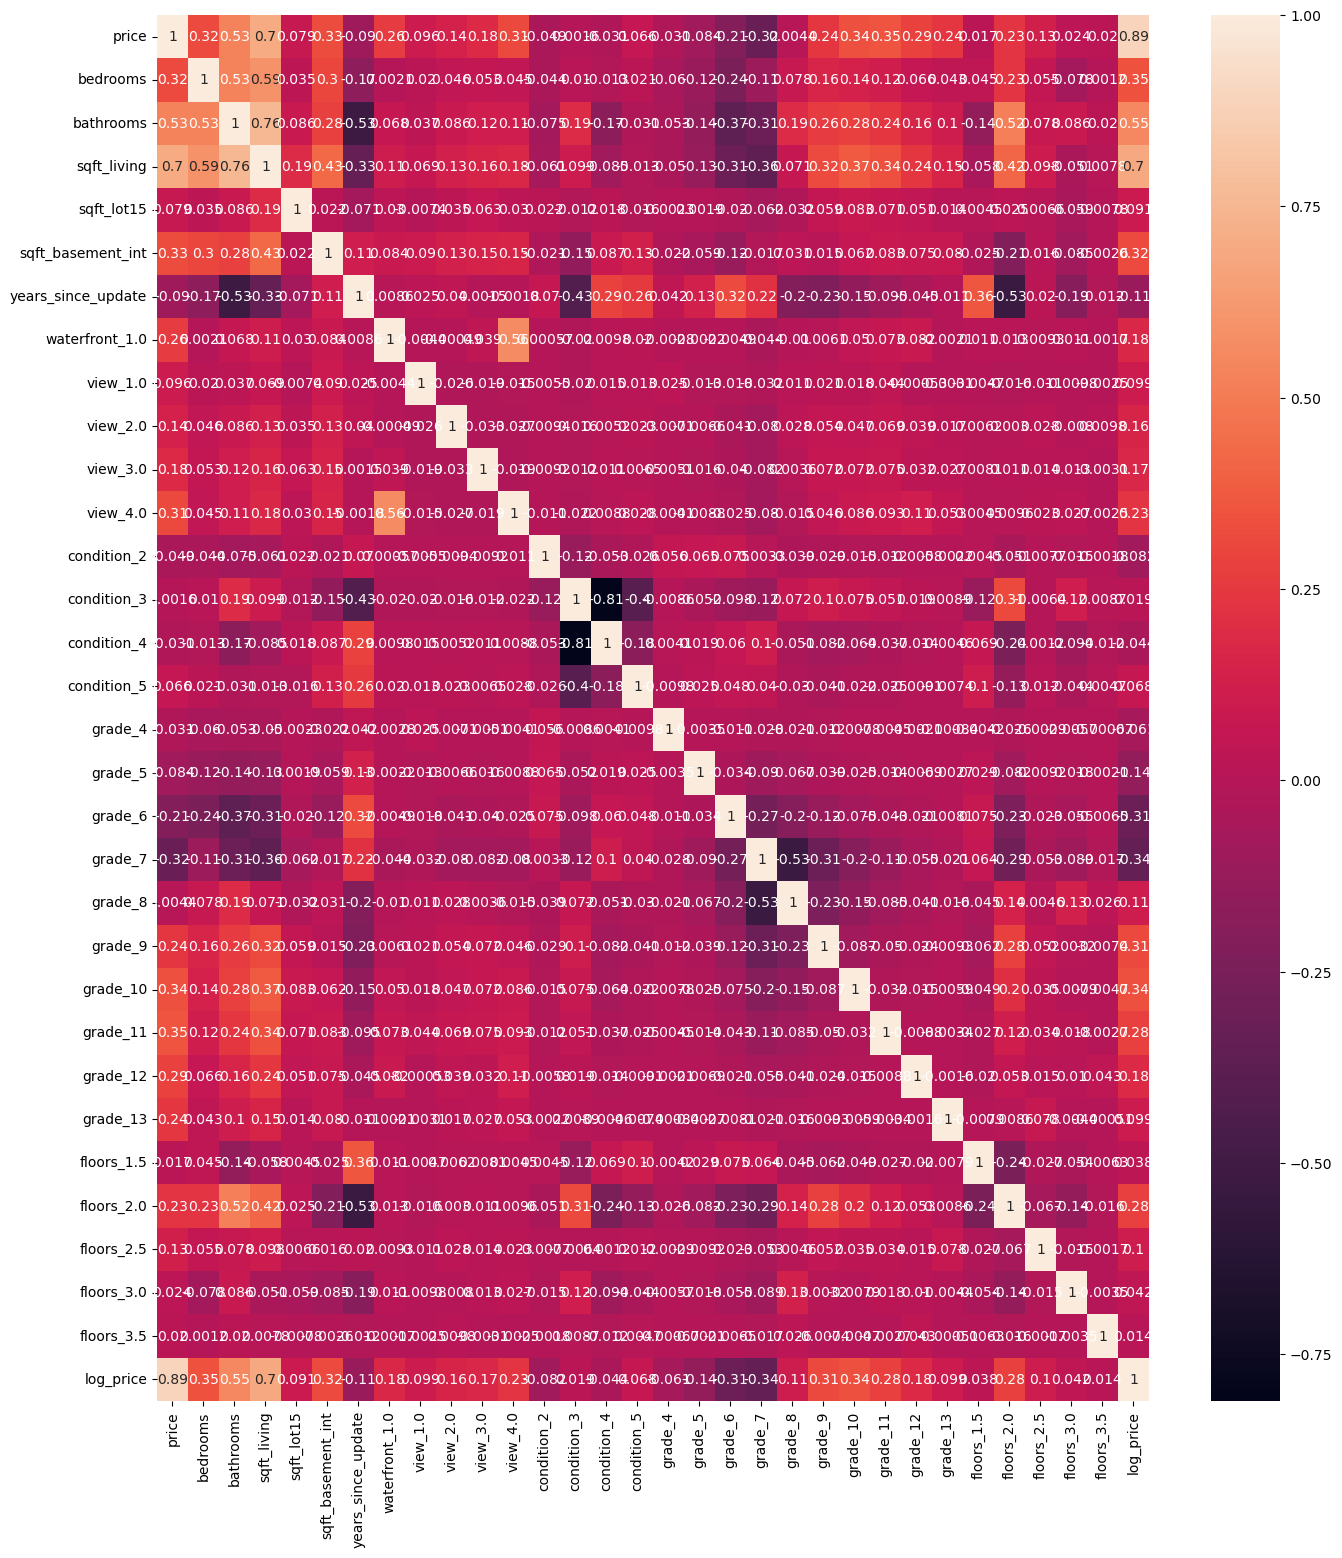

In [2852]:
plt.figure(figsize = (16,18))
sns.heatmap(train_data.corr(), annot = True)

# Takeaway from the heatmap:

High Correlation: There are strong positive correlations between 'sqft_living', 'grade', and 'sqft_above' with 'price', suggesting that larger and higher-quality homes tend to be priced higher.

Multicollinearity: There is also a high correlation between 'sqft_living' and 'sqft_above', which indicates multicollinearity. This could affect the model by making the coefficients less interpretable.

Negative Correlation: There is a notably negative correlation between 'years_since_update' and 'yr_built', which is logical since newer homes would have been updated more recently.

Weak or No Correlation: 'sqft_lot', 'waterfront', and 'view' show weak correlations with 'price'. However, the weak correlation for 'waterfront' and 'view' might be misleading due to the binary nature of these features or because they affect price in a nonlinear way.

Implications for Modeling: The variables with high correlation to price are likely good predictors for a regression model aimed at predicting house prices. However, multicollinearity should be addressed, possibly by removing or combining highly correlated features to improve model performance and interpretability.

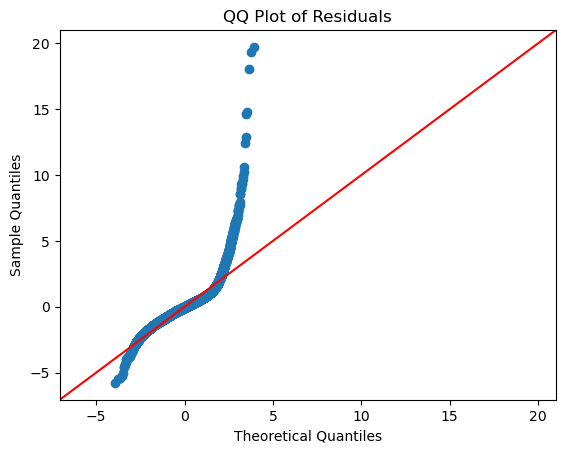

In [2853]:
fig = sm.qqplot(model.resid, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

The QQ plot shows that there are non-normally distributed residuals, which we'll need to improve upon for our next model. 

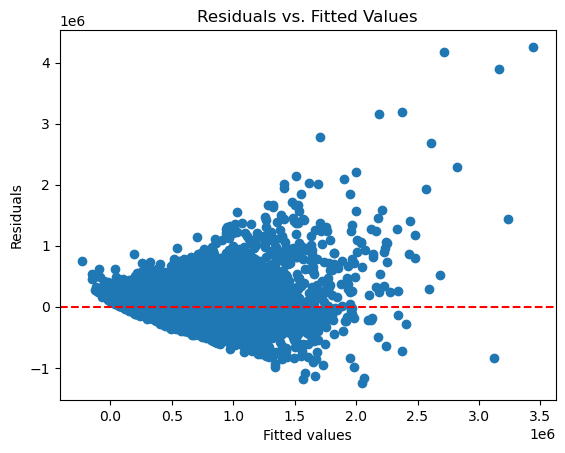

In [2854]:
# Plot residuals
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

As demonstrated above and in this model again, the residuals behaviour suggests potential non-linearity in the relationship between the predictors and the target variable as well as heteroscedasticity.

There are still some outliers demonstrated in this plot also.

# Model One

In [2855]:
from sklearn.model_selection import train_test_split

In [2856]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25)

In [2857]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [2858]:
lr.fit(X_train, Y_train)

LinearRegression()

In [2859]:
predictions = lr.predict(X_test)

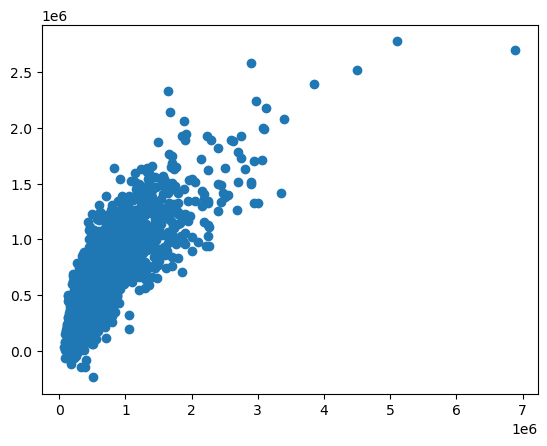

In [2860]:
plt.scatter(Y_test, predictions)

In [2861]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

model_summaries = []

fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    print(f"Processing Fold #{fold}")
    
    # Split into train and validation sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    X_train_const = sm.add_constant(X_train)
    
    model_train = sm.OLS(Y_train, X_train_const)
    results_train = model_train.fit()
    
    model_summaries.append(results_train.params)
    
average_coef = np.mean(model_summaries, axis=0)
print(f"Average Coefficients: {average_coef}")


Processing Fold #1
Processing Fold #2
Processing Fold #3
Processing Fold #4
Processing Fold #5
Average Coefficients: [ 6.22877495e+06 -4.33437438e+04  4.73813935e+04  1.14343269e+02
 -8.17810212e-03  2.67362921e+04  6.11321700e+05  4.34452477e+04
  2.01647060e+04  1.20086776e+05  4.84067024e+01 -3.58604257e+03
  2.46752594e+01 -5.63651331e-01  1.37344203e+01  5.53514576e+01]


# Interpretation of Graph

The scatter plot points do not align perfectly on a line and instead show some variance, with a concentration of data points where the model underpredicts, especially for higher values.

The graph aligns with previous observations about the model's residuals and the distribution of the data, such as the right-skewness of the price distribution, which can lead to prediction errors being larger for higher-priced houses. 

In [2862]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, Y_test_pred)

print(f'Coefficient of determination: {r2:.3f}')

Coefficient of determination: 0.643


Iteration 3 = Version 2 for all the variables
11. You will do log transformation, and feature scaling if required
12. You will run the statsmodel and capture adjusted R-squared
13. Identify your key-features
Model Validation and capture whether it’s under fitting or over-fitting

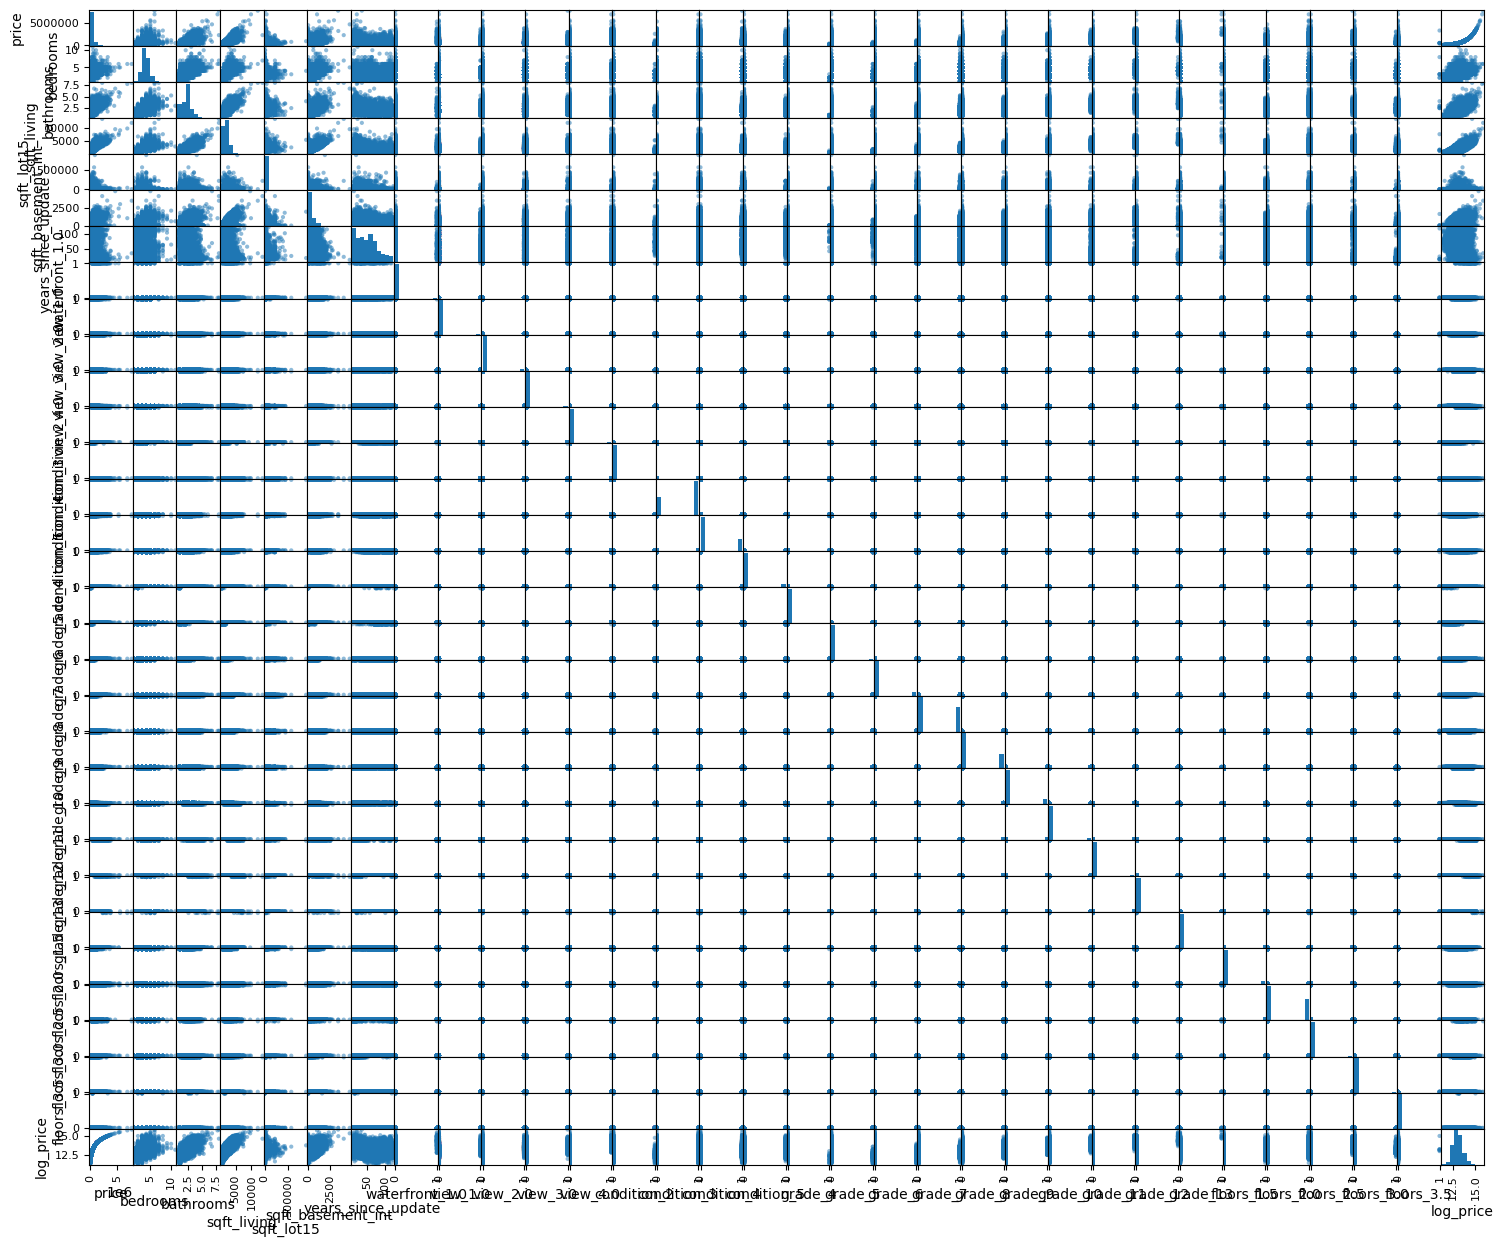

In [2863]:
pd.plotting.scatter_matrix(train_data,figsize  = [18, 15]);
plt.show()

# Assessing Multicollinearity:

sqft_living and sqft_above have a correlation coefficient of 0.874830, which is expected as the square footage of the house above ground (sqft_above) is part of the total living area (sqft_living). Since sqft_above is included in sqft_living we may drop sqft_above.

sqft_living and grade have a correlation coefficient of 0.762621 and indicates a strong relationship, suggesting that as the living area increases, the grade (overall quality and design) of the house tends to be higher.

sqft_living and sqft_living15 has a coefficient of 0.758491 shows these are closely related, which is logical because they both measure living area, though sqft_living15 reflects the living area in 2015, indicating perhaps a historical comparison or renovation impact.

It may also be useful to combine yr_built and yr_renovated_int into a single variable as these could be more relevant than year alone. The 'years_since_update' column represents the number of years since the property was last built or renovated.

In [2864]:
current_year = datetime.now().year 

df_clean['years_since_update'] = current_year - df_clean[['yr_built', 'yr_renovated_int']].max(axis=1)

In [2865]:
df_updated = df_clean.drop(['sqft_above', 'sqft_living15', 'yr_built', 'yr_renovated_int', 'sqft_lot'], axis=1)

In [2866]:
df_updated.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_lot15', 'sqft_basement_int',
       'years_since_update'],
      dtype='object')

In [2867]:
# Adding a constant to the predictor variable set for an intercept
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the model on the training set
model_train = sm.OLS(Y_train, X_train_const)
results_train = model_train.fit()

# Predict on the training set and the test set
Y_train_pred = results_train.predict(X_train_const)
Y_test_pred = results_train.predict(X_test_const)

# Calculate the mean squared error for the training set and the test set
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)

print(f"MSE Train: {mse_train}")
print(f"MSE Test: {mse_test}")

MSE Train: 47594769005.12297
MSE Test: 42548321886.29329


In [2868]:
from sklearn.metrics import mean_squared_error

median_price = Y_train.median()

baseline_preds_median = [median_price] * len(Y_test)

baseline_mse_median = mean_squared_error(Y_test, baseline_preds_median)

print(f'Median Baseline MSE: {baseline_mse_median}')

Median Baseline MSE: 127207877766.7437


The MSE of both the training and test sets for the model is significantly lower than the MSE of the median baseline model. This indicates that the model may have predictive power and is performing well.

# Lets deal with the dummy variables!

In [2869]:
df_dummy = pd.get_dummies(df_updated, columns=['waterfront', 'view', 'condition', 'grade', 'floors'], drop_first=True)

In [2870]:
df_dummy

,price,bedrooms,bathrooms,sqft_living,sqft_lot15,sqft_basement_int,years_since_update,waterfront_1.0,view_1.0,view_2.0,...,grade_9,grade_10,grade_11,grade_12,grade_13,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,221900.0,3,1.00,1180,5650,0,68,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7639,400,32,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,8062,0,90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,910,58,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,7503,0,36,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1509,0,14,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,400000.0,4,2.50,2310,7200,0,9,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21594,402101.0,2,0.75,1020,2007,0,14,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21595,400000.0,3,2.50,1600,1287,0,19,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [2871]:
Y2 = df_dummy['price']

In [2872]:
X2 = df_dummy.drop('price', axis=1)

In [2873]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2, test_size = 0.25)

In [2874]:
X2 = sm.add_constant(X2)

model2 = sm.OLS(Y2, X2).fit()

# Capture the Adjusted R-squared
new_adjusted_r_squared = model2.rsquared_adj
print(f'Adjusted R-squared: {new_adjusted_r_squared}')

print(model2.summary())

Adjusted R-squared: 0.6723001208506784
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     1478.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:04:57   Log-Likelihood:            -2.9532e+05
No. Observations:               21596   AIC:                         5.907e+05
Df Residuals:                   21565   BIC:                         5.909e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

The R2 is better in this model, but it can still be improved. Variables like sqft_living, grade, and sqft_above have significant p-values (p < 0.05), which suggests that they are statistically significant predictors of house price.
Some variables, such as condition_2, condition_3, and various grade categories, have high p-values, suggesting they are not statistically significant and will be removed in our next iteration.

Interestingly, the coefficient for bedrooms is negative, which is counterintuitive as we would expect more bedrooms to generally increase a house's price. This could be due to multicollinearity or other variables capturing the house size effect more effectively. Speaking of, there are still some potential multicollinearity issues within the data. This could be due to the high correlation between some of the predictors such as sqft_living and sqft_above.

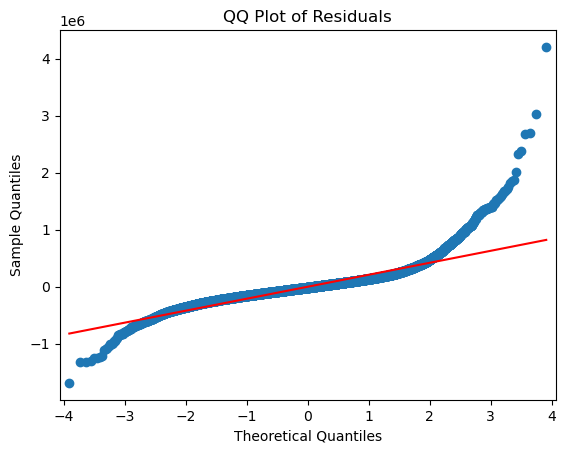

In [2875]:
# Generate the QQ plot for the residuals
qqplot(model2.resid, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

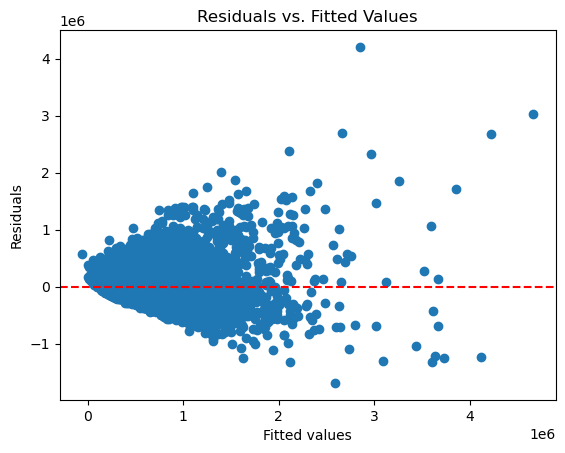

In [2876]:
# Plot residuals
plt.scatter(model2.fittedvalues, model2.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Model Two


In [2877]:
lr.fit(X2_train, Y2_train)

LinearRegression()

In [2878]:
predictions2 = lr.predict(X2_test)

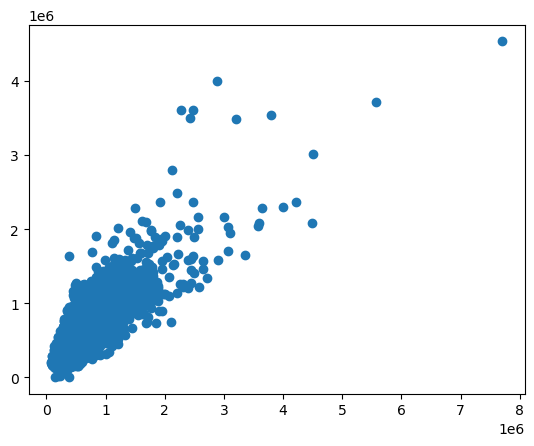

In [2879]:
plt.scatter(Y2_test, predictions2)

Positive Correlation: The plot indicates a positive correlation between actual and predicted values. As actual values increase, so do the predicted ones, which shows the model is performing well.

Model Accuracy: There's a cluster of points where the model seems to predict reasonably well, especially for lower values. However, the accuracy decreases with higher value predictions, as seen by the spread of points deviating from the line of equality (which would be a 45-degree line from the origin).

As we've noticed earlier in our data wrangling, there are still a few points with very high actual values, even though we dealt with outliers. This suggests the model will not be able to predict accurately when it comes to higher values. The range of predictions that are most accurately predicted by the model will be more affordable houses. 

There may be potenital of an overfitting model however. 

In [2880]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

X2_train_const = sm.add_constant(X2_train)
X2_test_const = sm.add_constant(X2_test)

model_train = sm.OLS(Y2_train, X2_train_const)
results_train = model_train.fit()

Y2_train_pred = results_train.predict(X2_train_const)
Y2_test_pred = results_train.predict(X2_test_const)

# Calculate the mean squared error for the training set and the test set
mse_train = mean_squared_error(Y2_train, Y2_train_pred)
mse_test = mean_squared_error(Y2_test, Y2_test_pred)

print(f"MSE Train: {mse_train}")
print(f"MSE Test: {mse_test}")


MSE Train: 43703224430.16652
MSE Test: 46331381234.14781


In [2881]:
median_price = Y2_train.median()

baseline_preds_median = [median_price] * len(Y2_test)

# Calculate the MSE for the median baseline
baseline_mse_median = mean_squared_error(Y2_test, baseline_preds_median)

print(f'Median Baseline MSE: {baseline_mse_median}')

Median Baseline MSE: 138520851923.23355


The model has learned patterns from the data and is making predictions that are significantly closer to the actual values than a regular median value prediction. The training and test MSEs are close, suggesting the model is in fact not overfitting and generalizes well but there is still room for improvement.

In [2882]:
r2 = r2_score(Y2_test, Y2_test_pred)

print(f'Coefficient of determination: {r2:.3f}')

Coefficient of determination: 0.646


The model's R-squared value of 0.635 indicates it explains approximately 63.5% of the variance in house prices, showing a decent fit. However, the MSE values reveal that there's still a significant average error in the predictions. Despite this, the model performs better than the baseline, which has a much higher MSE of ~137.51 billion. This suggests that while the model is capturing key trends in the data, there's potential to reduce prediction errors and improve accuracy.

In [2883]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

model_summaries = []

fold = 0
for train_index, test_index in kf.split(X2):
    fold += 1
    print(f"Processing Fold #{fold}")
    
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    Y_train, Y_test = Y2.iloc[train_index], Y2.iloc[test_index]
    
    
    X_train_const = sm.add_constant(X_train)
    
    
    model_train = sm.OLS(Y2_train, X2_train_const)
    results_train = model_train.fit()
    
    model_summaries.append(results_train.params)
    
average_coef = np.mean(model_summaries, axis=0)
print(f"Average Coefficients: {average_coef}")

Processing Fold #1
Processing Fold #2
Processing Fold #3
Processing Fold #4
Processing Fold #5
Average Coefficients: [-2.03447149e+05 -2.77498486e+04  4.79779240e+04  1.34229383e+02
 -6.32739230e-01  2.91190331e+01  2.64537693e+03  5.24909543e+05
  1.37072806e+05  5.53071362e+04  1.22283582e+05  2.53466468e+05
  3.79476182e+04  6.31236402e+04  7.82663441e+04  1.22680751e+05
  7.07195731e+03  2.51117327e+04  6.70646237e+04  1.41925386e+05
  2.28781166e+05  3.81933804e+05  5.59129308e+05  8.24687210e+05
  1.24847116e+06  2.71048732e+06  3.47098097e+04  9.65533201e+03
  1.64470485e+05  1.03757768e+05  1.97824926e+05]


# Model Three

In [2884]:
Y3 = df_dummy['price']

In [2885]:
X3 = df_dummy.drop(['sqft_basement_int', 'years_since_update', 'view_2.0', 'condition_2', 
               'condition_3', 'condition_4', 'condition_5', 'grade_4', 'grade_5', 
               'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 
               'floors_3.0', 'price'], axis = 1, errors='ignore')

In [2886]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3,Y3, test_size = 0.25)

In [2887]:
X3.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot15', 'waterfront_1.0',
       'view_1.0', 'view_3.0', 'view_4.0', 'grade_12', 'grade_13',
       'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.5'],
      dtype='object')

In [2888]:
X3 = sm.add_constant(X3)

model3 = sm.OLS(Y3, X3).fit()

# Capture the Adjusted R-squared
new_adjusted_r_squared = model3.rsquared_adj
print(f'Adjusted R-squared: {new_adjusted_r_squared}')

print(model3.summary())

Adjusted R-squared: 0.5923674822709148
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2243.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:04:59   Log-Likelihood:            -2.9768e+05
No. Observations:               21596   AIC:                         5.954e+05
Df Residuals:                   21581   BIC:                         5.955e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const

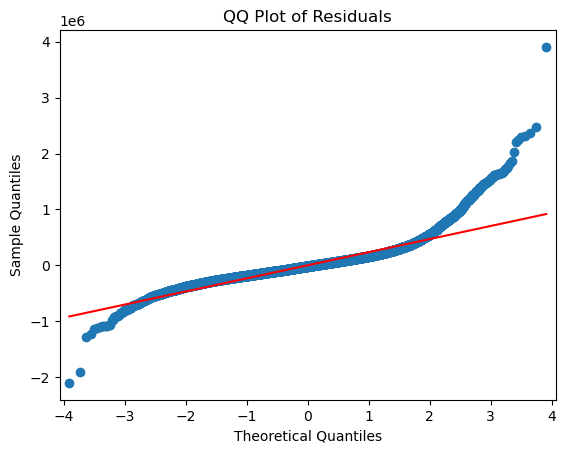

In [2889]:
# Generate the QQ plot for the residuals
qqplot(model3.resid, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

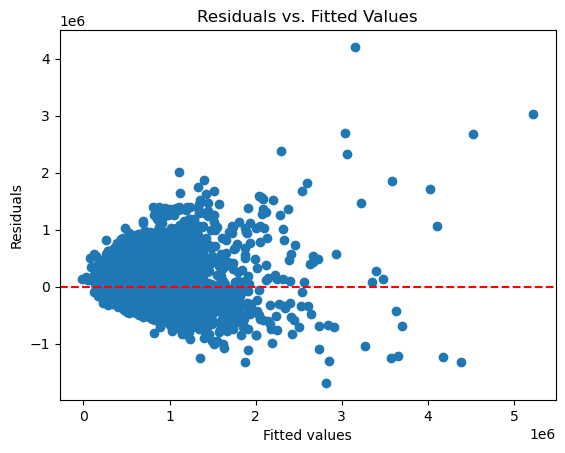

In [2890]:
# Plot residuals
plt.scatter(model3.fittedvalues, model2.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

In [2891]:
lr.fit(X3_train, Y3_train)

LinearRegression()

In [2892]:
predictions3 = lr.predict(X3_test)

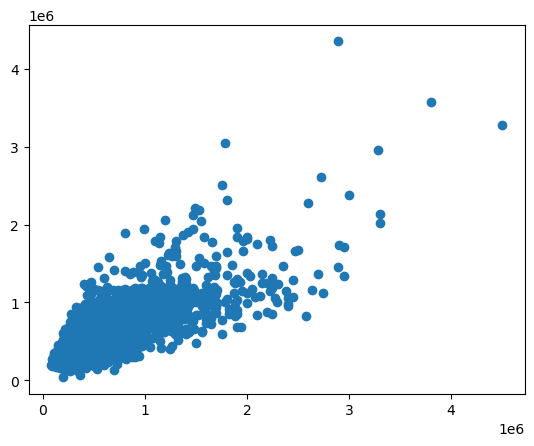

In [2893]:
plt.scatter(Y3_test, predictions3)

# Validation for Model 3

In [2894]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=42)

X3_train_const = sm.add_constant(X3_train)
X3_test_const = sm.add_constant(X3_test)

# Fit the model on the training set
model_train = sm.OLS(Y3_train, X3_train_const)
results_train = model_train.fit()

# Predict on the training set and the test set
Y3_train_pred = results_train.predict(X3_train_const)
Y3_test_pred = results_train.predict(X3_test_const)

mse_train = mean_squared_error(Y3_train, Y3_train_pred)
mse_test = mean_squared_error(Y3_test, Y3_test_pred)

print(f"MSE Train: {mse_train}")
print(f"MSE Test: {mse_test}")

MSE Train: 54931959940.851395
MSE Test: 55411822185.474174


In [2895]:
median_price = Y3_train.median()

baseline_preds_median = [median_price] * len(Y3_test)

baseline_mse_median = mean_squared_error(Y3_test, baseline_preds_median)

print(f'Median Baseline MSE: {baseline_mse_median}')

Median Baseline MSE: 138520851923.23355


In [2896]:
r2 = r2_score(Y3_test, Y3_test_pred)

print(f'Coefficient of determination: {r2:.3f}')

Coefficient of determination: 0.577


In [2897]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

model_summaries = []

fold = 0
for train_index, test_index in kf.split(X3):
    fold += 1
    print(f"Processing Fold #{fold}")
    
    X_train, X_test = X3.iloc[train_index], X3.iloc[test_index] 
    Y_train, Y_test = Y3.iloc[train_index], Y3.iloc[test_index]
    
    X_train_const = sm.add_constant(X_train)
    
    model3_train = sm.OLS(Y3_train, X3_train_const)
    results_train = model3_train.fit()
    

    model_summaries.append(results_train.params)

average_coef = np.mean(model_summaries, axis=0)
print(f"Average Coefficients: {average_coef}")


Processing Fold #1
Processing Fold #2
Processing Fold #3
Processing Fold #4
Processing Fold #5
Average Coefficients: [ 9.39330623e+04 -5.26090709e+04  2.84411118e+04  2.69135102e+02
 -9.16081363e-01  5.18129465e+05  1.66822466e+05  1.78401326e+05
  3.21047621e+05  6.01437153e+05  1.81184014e+06  8.35308588e+04
 -3.13098436e+04  2.21922308e+05  1.73890854e+05]


# Log Transformation

In [2898]:
df_dummy['log_price'] = np.log(df_dummy['price'] + 1)

In [2899]:
X4 = df_dummy.drop(['price', 'log_price'], axis=1)
Y4 = df_dummy['log_price']

In [2900]:
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4,Y4, test_size = 0.25)

In [2901]:
X4 = sm.add_constant(X3)

model4 = sm.OLS(Y4, X4).fit()

new_adjusted_r_squared = model4.rsquared_adj
print(f'Adjusted R-squared: {new_adjusted_r_squared}')

print(model4.summary())

Adjusted R-squared: 0.523069705335111
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     1693.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:05:01   Log-Likelihood:                -8789.8
No. Observations:               21596   AIC:                         1.761e+04
Df Residuals:                   21581   BIC:                         1.773e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const 

# Important features in our model

bedrooms, bathrooms, sqft_living: These features have relatively large coefficients and small p-values, suggesting they are significant predictors of log_price.

waterfront_1.0, view categories, floors categories: These dummy variables also show significant coefficients and p-values, indicating their importance.

sqft_lot15: Despite its very small coefficient, it is statistically significant.

grade_12 and floors_2.0: These features have large p-values, suggesting they are not statistically significant predictors in your model.

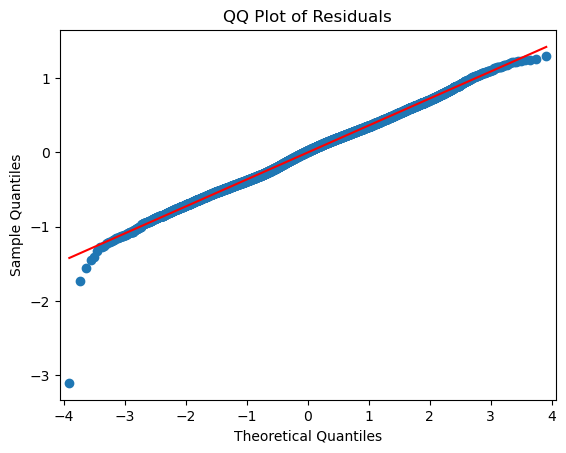

In [2902]:
qqplot(model4.resid, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

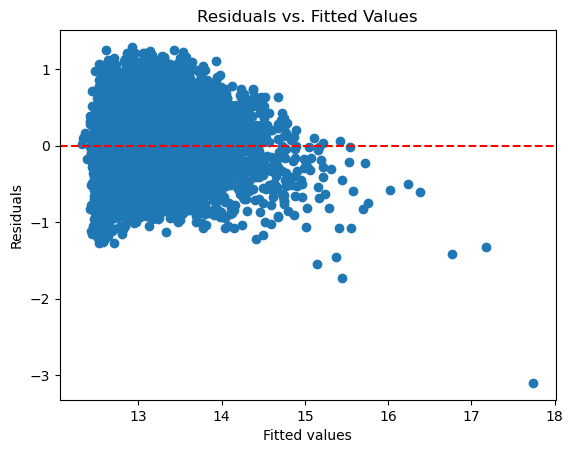

In [2903]:
# Plot residuals
plt.scatter(model4.fittedvalues, model4.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

The plot shows that the residuals are not evenly spread out as the fitted values increase. There is a wider spread of residuals for higher fitted values and some evidence of a pattern where the variance of residuals appears to increase with the fitted values. This fanning out or cone-like shape is indicative of heteroscedasticity.



In [2904]:
lr.fit(X4_train,Y4_train)

LinearRegression()

In [2905]:
predictions4 = lr.predict(X4_test)

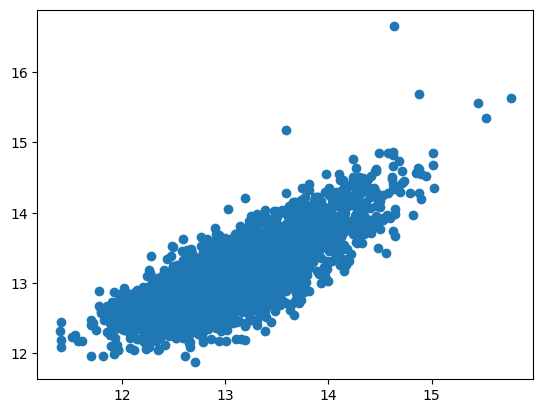

In [2906]:
plt.scatter(Y4_test, predictions4)

Fit a linear regression model to predict the 'price' using the list of features:

# Validating Model 4

In [2907]:
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.2, random_state=42)

X4_train_const = sm.add_constant(X4_train)
X4_test_const = sm.add_constant(X4_test)

# Fit the model on the training set
model_train = sm.OLS(Y4_train, X4_train_const)
results_train = model_train.fit()

Y4_train_pred = results_train.predict(X4_train_const)
Y4_test_pred = results_train.predict(X4_test_const)

mse_train = mean_squared_error(Y4_train, Y4_train_pred)
mse_test = mean_squared_error(Y4_test, Y4_test_pred)

print(f"MSE Train: {mse_train}")
print(f"MSE Test: {mse_test}")

MSE Train: 0.1322053550445959
MSE Test: 0.13199232095404467


In [2908]:
r2 = r2_score(Y4_test, Y4_test_pred)

print(f'Coefficient of determination: {r2:.3f}')

Coefficient of determination: 0.517


In [2909]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

model_summaries = []

fold = 0
for train_index, test_index in kf.split(X4):
    fold += 1
    print(f"Processing Fold #{fold}")
    
    X_train, X_test = X4.iloc[train_index], X4.iloc[test_index]
    Y_train, Y_test = Y4.iloc[train_index], Y4.iloc[test_index] 
    
    X_train_const = sm.add_constant(X_train)
    
    # Fit the model on the training set
    model4_train = sm.OLS(Y4_train, X4_train_const)
    results_train = model4_train.fit()
    
    model_summaries.append(results_train.params)

average_coef = np.mean(model_summaries, axis=0)
print(f"Average Coefficients: {average_coef}")


Processing Fold #1
Processing Fold #2
Processing Fold #3
Processing Fold #4
Processing Fold #5
Average Coefficients: [ 1.23018622e+01 -6.42575533e-02  7.06014228e-02  3.80905451e-04
 -9.13747153e-07  3.14035845e-01  2.39524081e-01  2.28918129e-01
  3.43194804e-01 -2.50740638e-02 -3.44059250e-01  1.79064915e-01
 -6.24473932e-04  2.34647978e-01  1.99488842e-01]


Given the close MSE values for both the train and test sets, along with a moderate coefficient of determination, the model is likely performing reasonably well, without signs of overfitting or underfitting.
The model's effectiveness could still be limited by the fact that only just over half of the variance in the dependent variable is explained by the predictors. This could suggest that there are other important variables not included in the model or that there are non-linear relationships not captured by the current model.

# Limitations of our model

As we've worked through the model, it's become clear that the model is quite capable at predicting accurately the more affordable house prices in Kings County and that most predictions are within a lower range.

Even with the log transformation of our model, which is designed to help when the data is highly skewed or when the residuals show heteroscedasticity (as the majority of our scatter plots showed), it's clear that our model is not able to accurately predict at higher actual values.

This means that we'd need to include some better feature engineering, address multicollinearity and highly skewed/outlier data in our future subsequent models.

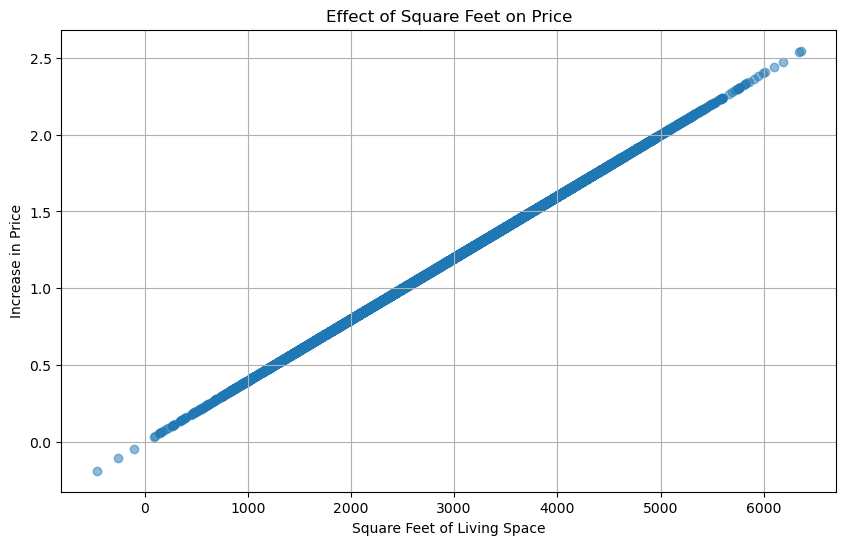

In [2910]:
# Simulate some data for 'sqft_living' (continuous variable)
sqft_living = np.random.normal(3000, 850, 21597)  # we're assuming a mean of 3000 sqft and std of 850
price_increase_sqft = sqft_living * 0.0004  # Using the coefficient from OLS results

# Plot for 'sqft_living'
plt.figure(figsize=(10, 6))
plt.scatter(sqft_living, price_increase_sqft, alpha=0.5)
plt.title('Effect of Square Feet on Price')
plt.xlabel('Square Feet of Living Space')
plt.ylabel('Increase in Price')
plt.grid(True)
plt.show()


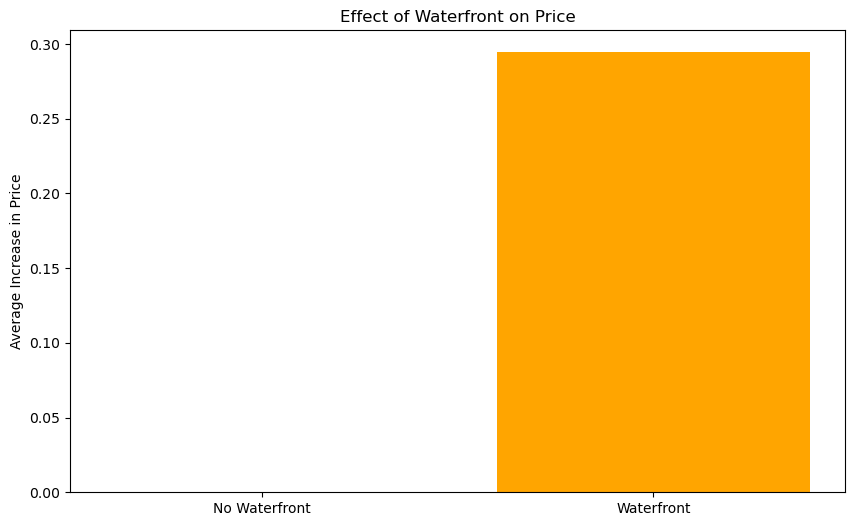

In [2911]:
# Simulate 'waterfront' data (categorical variable)
waterfront = np.random.choice([0, 1], size=21597, p=[0.99, 0.01])  # 1% of houses with waterfront
price_increase_waterfront = waterfront * 0.2945  # Using the coefficient from OLS results

# Calculate the mean increase in log price for each category
mean_price_no_waterfront = np.mean(price_increase_waterfront[waterfront == 0])
mean_price_waterfront = np.mean(price_increase_waterfront[waterfront == 1])

plt.figure(figsize=(10, 6))
plt.bar(['No Waterfront', 'Waterfront'], [mean_price_no_waterfront, mean_price_waterfront], color='orange')
plt.title('Effect of Waterfront on Price')
plt.ylabel('Average Increase in Price')
plt.show()

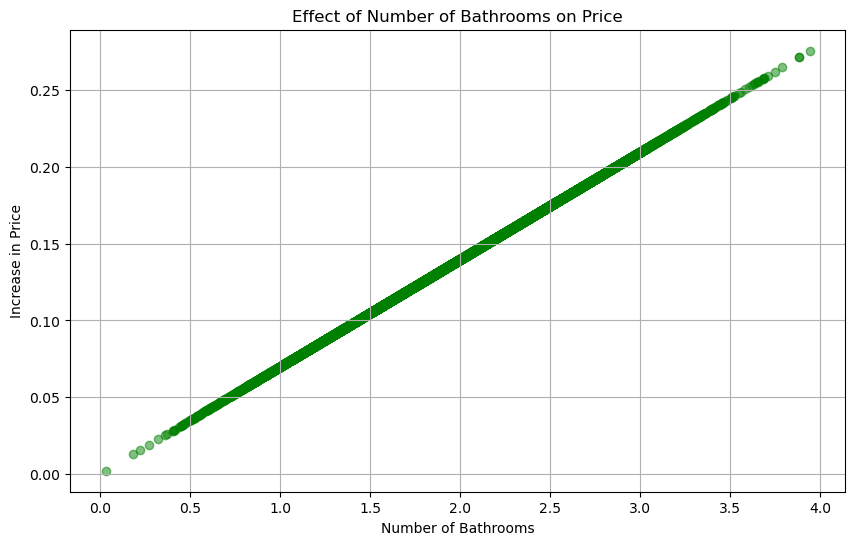

In [2912]:
# Assuming an average of 2 bathrooms with a standard deviation of 0.5
bathrooms = np.random.normal(2, 0.5, 21597)
price_increase_bathrooms = bathrooms * 0.0699  # Using the coefficient from OLS results

plt.figure(figsize=(10, 6))
plt.scatter(bathrooms, price_increase_bathrooms, alpha=0.5, color='green')
plt.title('Effect of Number of Bathrooms on Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Increase in Price')
plt.grid(True)
plt.show()

